# Advanced Pytorch


##Sequential

Uses:

- Simple and concise for linear archiecture#
- Limited to layer stacking
- Best for quick prototyping and small networks


In [1]:
import torch
import torch.nn as nn

In [2]:
# Define a neural network using sequential

sequential_model= nn.Sequential(
    nn.Linear(20, 64),  # Input layers x= 20
    nn.ReLU(),
    nn.Linear(64, 32),   # hidden layers  64,32
    nn.ReLU(),
    nn.Linear(32, 5),    # hidden layers 32 is connected to output is 5 target classes-y = 5

)
print(sequential_model)


# try on random 10*20 matrix
input_data = torch.randn(10, 20)
output = sequential_model(input_data)
print(output)

Sequential(
  (0): Linear(in_features=20, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=5, bias=True)
)
tensor([[ 0.0707,  0.1626,  0.1547,  0.1838,  0.0029],
        [ 0.0560,  0.2396,  0.0204,  0.1502, -0.1632],
        [-0.0188,  0.1342,  0.2077,  0.0933, -0.1321],
        [-0.0527,  0.1953,  0.1487,  0.1195, -0.1285],
        [-0.0112,  0.2639,  0.0582,  0.2079, -0.1990],
        [ 0.1282,  0.1535,  0.1313,  0.0252, -0.1161],
        [ 0.1792,  0.1117,  0.1311,  0.0969,  0.1194],
        [-0.0411,  0.2478,  0.1906,  0.2374, -0.0706],
        [ 0.0144,  0.1014,  0.0992,  0.0361, -0.0122],
        [ 0.0610,  0.1136,  0.0515,  0.0560, -0.0267]],
       grad_fn=<AddmmBackward0>)


## Weights and bias of Sequential Model

In [3]:
print(f"Model weights {sequential_model[0].weight.data}")
print(f"Model bias {sequential_model[0].bias.data}")

Model weights tensor([[-0.2216, -0.0054, -0.1087,  ..., -0.0080, -0.1399, -0.1487],
        [ 0.1958,  0.1959, -0.1235,  ..., -0.1347, -0.1816, -0.1541],
        [ 0.2071, -0.0388,  0.0520,  ..., -0.1029, -0.0256, -0.1433],
        ...,
        [ 0.1547,  0.2046, -0.1866,  ...,  0.0254, -0.1296,  0.0382],
        [-0.1811,  0.1341, -0.2046,  ..., -0.1176,  0.0859, -0.1910],
        [ 0.1350,  0.1006,  0.1126,  ...,  0.1981,  0.1504,  0.0411]])
Model bias tensor([ 0.0370,  0.0640,  0.1272, -0.1123, -0.1056,  0.0748,  0.2032, -0.2126,
        -0.1102, -0.0914,  0.0981,  0.0872,  0.0297, -0.0716, -0.0076,  0.0632,
        -0.0385, -0.0992, -0.0118, -0.2146,  0.1289, -0.0002, -0.1124, -0.1855,
        -0.1384, -0.1924, -0.2133,  0.0810, -0.0139, -0.1173, -0.0469,  0.1656,
         0.0380, -0.1989,  0.0835,  0.0013, -0.1806,  0.1099,  0.1567, -0.0955,
        -0.0198,  0.2126, -0.1094, -0.1724, -0.1751, -0.1817, -0.0452, -0.0741,
         0.0131, -0.1133,  0.1035, -0.1078, -0.0767,  0.1889,

##Functional API

Purpose: For custom or complex models where you need more flexibility, such as:

- Skip connections (like in ResNet).

- Multiple inputs/outputs.

- Shared weights across layers.

- Conditional logic or branching.

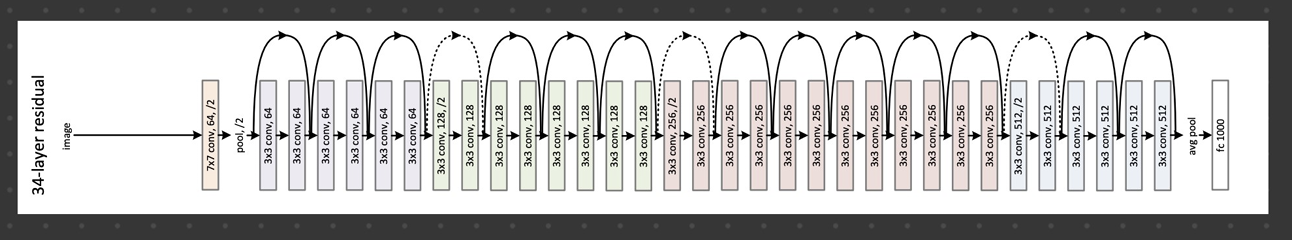

In [4]:
class FunctionalModel(nn.Module):
  def __init__(self):
    super(FunctionalModel,self).__init__()
    self.linear1 = nn.Linear(20, 64)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(64, 32)
    self.linear3 = nn.Linear(32, 5)

    def forward(self, x):
      x1= self.relu(self_linear1(X))
      x2= self.relu(self_linear1(X1))
      x3=self.relu(self_linear3(X2))
      return x

functional_model = FunctionalModel()
print(functional_model)

input_data = torch.randn(10, 20)
print(input_data)
output = sequential_model(input_data)
print(output)

FunctionalModel(
  (linear1): Linear(in_features=20, out_features=64, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=5, bias=True)
)
tensor([[-0.2890,  1.0086,  0.3653, -1.9884, -0.1512,  0.5828,  0.3242,  1.2807,
          1.0992, -0.4332,  0.3404,  0.2189, -0.2845,  0.8623, -0.0180, -0.6579,
         -0.1107, -1.1503, -0.5858,  0.3656],
        [ 0.7121,  0.6242, -1.1057, -0.4678, -0.0401,  1.7260, -0.8944, -0.0188,
         -1.7253, -0.0676,  1.0755, -0.5667, -1.0265,  0.6485, -0.3619,  0.6406,
          0.7462,  2.8600, -0.0225,  0.7200],
        [-2.2919,  1.5882,  0.8982, -0.9656,  0.2717, -0.9624, -0.9671, -0.7653,
          1.0675, -2.7956,  0.2704,  0.7485,  0.5230,  0.7448,  0.8158,  0.1039,
         -0.0713,  0.6801,  0.1425, -0.2485],
        [-0.9170, -0.2705, -0.8419, -1.2708, -0.2274,  0.0034,  1.1447, -0.7914,
          1.3489,  1.4148,  1.3157,  0.6642, -0.3490,  1.5547,  0.54

# Multi Class Classification with Pytorch

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
if torch.cuda.is_available():
  print("GPU is available")
else:
  print("CPU")

CPU


In [7]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")  #cuda is GPU

In [8]:
iris= load_iris()
x= iris.data
y=iris.target
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

#Split the iris dataset

In [11]:
# Define the neural network model
class NeuralNetBasic(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetBasic, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Output layer for classification

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Model parameters
input_size = X_train.shape[1]  # Number of features (4 for Iris)
hidden_size = 32  # Arbitrary hidden layer size
num_classes = len(iris.target_names)  # Number of output classes (3 for Iris)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Loss Function - Cross entropy used for classification methods

In [12]:
# Initialize model, loss, and optimizer
model = NeuralNetBasic(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100

In [13]:
def train(X_train, y_train):
    model.train()  # Set model to training mode
    X_train = X_train.to(device)
    y_train = y_train.to(device)

    for epoch in range(num_epochs):
        # Forward pass
        output = model(X_train)
        loss = criterion(output, y_train)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:  # Print every 10 epochs
            print(f"Epoch {epoch + 1}, Loss: {loss.item():.4f}")

train(X_train, y_train)

Epoch 10, Loss: 1.0659
Epoch 20, Loss: 0.9921
Epoch 30, Loss: 0.9228
Epoch 40, Loss: 0.8559
Epoch 50, Loss: 0.7905
Epoch 60, Loss: 0.7273
Epoch 70, Loss: 0.6676
Epoch 80, Loss: 0.6125
Epoch 90, Loss: 0.5626
Epoch 100, Loss: 0.5184


In [14]:
# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: torch.Size([120, 4])
X_test shape: torch.Size([30, 4])


# Advanced Neural Network of multiple layers

In [24]:
# Neural network model with multiple layers
class NeuralNetAdvance(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(NeuralNetAdvance, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)  # First hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)  # Second hidden layer
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)  # Third hidden layer
        self.fc4 = nn.Linear(hidden_size3, num_classes)  # Output layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.dropout = nn.Dropout(p=0.5)  # Dropout for regularization

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout to the first hidden layer

        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout to the second hidden layer

        x = self.fc3(x)
        x = self.relu(x)

        x = self.fc4(x)  # Output layer (no activation, as CrossEntropyLoss applies softmax)
        return x

# Model parameters
input_size = X_train.shape[1]  # Number of features (4 for Iris)
hidden_size1 = 40  # First hidden layer size
hidden_size2 = 80  # Second hidden layer size
hidden_size3 = 100  # Third hidden layer size
num_classes = len(iris.target_names)  # Number of output classes (3 for Iris)

# Instantiate the model
model = NeuralNetAdvance(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes).to(device)


In [25]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 300

def train_model(X_train, y_train):
    model.train()
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [26]:
train(X_train, y_train)

Epoch 10, Loss: 1.0203
Epoch 20, Loss: 0.8936
Epoch 30, Loss: 0.7072
Epoch 40, Loss: 0.4992
Epoch 50, Loss: 0.3619
Epoch 60, Loss: 0.3224
Epoch 70, Loss: 0.2611
Epoch 80, Loss: 0.3136
Epoch 90, Loss: 0.2513
Epoch 100, Loss: 0.1798
Epoch 110, Loss: 0.2203
Epoch 120, Loss: 0.1519
Epoch 130, Loss: 0.2910
Epoch 140, Loss: 0.1863
Epoch 150, Loss: 0.2460
Epoch 160, Loss: 0.1547
Epoch 170, Loss: 0.2040
Epoch 180, Loss: 0.0948
Epoch 190, Loss: 0.1194
Epoch 200, Loss: 0.1251
Epoch 210, Loss: 0.1025
Epoch 220, Loss: 0.1368
Epoch 230, Loss: 0.1132
Epoch 240, Loss: 0.1198
Epoch 250, Loss: 0.1475
Epoch 260, Loss: 0.1197
Epoch 270, Loss: 0.0911
Epoch 280, Loss: 0.1258
Epoch 290, Loss: 0.0975
Epoch 300, Loss: 0.1220


# Working with Data

### Data Loader

A DataLoader in PyTorch is a utility that simplifies and optimizes the process of loading data for training and testing machine learning models. It allows you to:

- Efficiently load data in batches.

- Shuffle the data during training.

- Perform parallel data loading using multiple workers.

- Handle large datasets without loading everything into memory at once.


In [58]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader


class NumericalDataset(Dataset):
  def __init__(self, data, targets):

    if isinstance(data,pd.DataFrame):
      data=data.values

    if isinstance(targets,pd.Series):
      targets=targets.values

    self.data=torch.tensor(data,dtype=torch.float32)
    self.targets=torch.tensor(targets,dtype=torch.float32)

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    return self.data[idx],self.targets[idx]


In [59]:
import os
import csv

data_list = [
    [0.374540, 0.950714, 0.731994, 0.598658, 0],
    [0.156019, 0.155995, 0.058084, 0.866176, 1],
    [0.601115, 0.708073, 0.020584, 0.969910, 0],
    [0.832443, 0.212339, 0.181825, 0.183405, 2],
    [0.304242, 0.524756, 0.431945, 0.291229, 1],
    [0.611853, 0.139494, 0.292145, 0.366362, 2],
    [0.456070, 0.785176, 0.199674, 0.514234, 1],
    [0.592415, 0.046450, 0.607545, 0.170524, 0],
    [0.065052, 0.948886, 0.965632, 0.808397, 2],
    [0.304614, 0.097672, 0.684233, 0.440152, 1],
]

cwd= os.getcwd()
# Assign a directory path to the 'csv_dir' variable
csv_dir = cwd  # Or any other desired directory
csv_file = os.path.join(csv_dir, 'numerical_data_from_list.csv') # Use os.path.join to create the file path


with open(csv_file, mode= 'w', newline='') as file:
  writer = csv.writer(file)

  writer.writerow(['feature1', 'feature2', 'feature3', 'feature4', 'target'])
  writer.writerows(data_list)

In [60]:
# Example numerical dataset
cwd = os.getcwd()
csv_file = f'{cwd}/numerical_data_from_list.csv'

df = pd.read_csv(csv_file)  # Replace with your CSV file
X = df.drop('target', axis=1)  # Features
y = df['target']  # Labels

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize features using StandardScaler (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(X_train[0, :])
print(type(X_train))
print(y_train.values)
print(type(y_train))

# Create Dataset objects
train_dataset = NumericalDataset(X_train, y_train)
val_dataset = NumericalDataset(X_val, y_val)
test_dataset = NumericalDataset(X_test, y_test)

# Create DataLoader objects
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

# Example: Iterating through batches of the train_loader
for data_batch, labels_batch in train_loader:
    print(data_batch.shape, labels_batch.shape)


[ 0.41665375 -1.19766889  1.05757176 -0.94518329]
<class 'numpy.ndarray'>
[0 0 1 1 2 1]
<class 'pandas.core.series.Series'>
torch.Size([6, 4]) torch.Size([6])
